In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/marcostellez/code/abefarkas/Thalassa_Regime_Classifier/raw_data/BTCUSDT_220624-trades-2022-05-19.csv')

In [3]:
data

,2445607,28739.8,0.003,86.2,1652918402719,true
0,2445608,28732.9,0.031,890.7,1652918402795,True
1,2445609,28728.2,0.026,746.9,1652918402830,True
2,2445610,28740.4,0.003,86.2,1652918408027,False
3,2445611,28746.2,0.004,114.9,1652918408027,False
4,2445612,28768.8,0.012,345.2,1652918422483,False
...,...,...,...,...,...,...
47067,2492675,30389.7,0.028,850.9,1653004759599,True
47068,2492676,30389.7,0.082,2491.9,1653004759601,True
47069,2492677,30388.0,0.002,60.7,1653004781023,False
47070,2492678,30389.7,0.001,30.3,1653004793456,False


In [4]:
data.columns = ['Trade_Id','price','qty','quoteQty','time','isBuyerMaker']

In [5]:
def log_price(list_stock_prices):
    return np.log(list_stock_prices)

In [6]:
data.insert(5, 'log_price', log_price(data['price']))

In [7]:
data

,Trade_Id,price,qty,quoteQty,time,log_price,isBuyerMaker
0,2445608,28732.9,0.031,890.7,1652918402795,10.265798,True
1,2445609,28728.2,0.026,746.9,1652918402830,10.265634,True
2,2445610,28740.4,0.003,86.2,1652918408027,10.266059,False
3,2445611,28746.2,0.004,114.9,1652918408027,10.266261,False
4,2445612,28768.8,0.012,345.2,1652918422483,10.267047,False
...,...,...,...,...,...,...,...
47067,2492675,30389.7,0.028,850.9,1653004759599,10.321859,True
47068,2492676,30389.7,0.082,2491.9,1653004759601,10.321859,True
47069,2492677,30388.0,0.002,60.7,1653004781023,10.321803,False
47070,2492678,30389.7,0.001,30.3,1653004793456,10.321859,False


In [8]:
data['log_returns'] = data.log_price.diff()

In [9]:
data

,Trade_Id,price,qty,quoteQty,time,log_price,isBuyerMaker,log_returns
0,2445608,28732.9,0.031,890.7,1652918402795,10.265798,True,NaN
1,2445609,28728.2,0.026,746.9,1652918402830,10.265634,True,-0.000164
2,2445610,28740.4,0.003,86.2,1652918408027,10.266059,False,0.000425
3,2445611,28746.2,0.004,114.9,1652918408027,10.266261,False,0.000202
4,2445612,28768.8,0.012,345.2,1652918422483,10.267047,False,0.000786
...,...,...,...,...,...,...,...,...
47067,2492675,30389.7,0.028,850.9,1653004759599,10.321859,True,0.000000
47068,2492676,30389.7,0.082,2491.9,1653004759601,10.321859,True,0.000000
47069,2492677,30388.0,0.002,60.7,1653004781023,10.321803,False,-0.000056
47070,2492678,30389.7,0.001,30.3,1653004793456,10.321859,False,0.000056


In [55]:
def realized_volatility():
    list_vol = []
    i = 0
    for i in data.index:
        x = np.std(data.log_returns.iloc[:i])
        i += 1
        list_vol.append(x)
    
    return list_vol

In [56]:
data.index

RangeIndex(start=0, stop=47072, step=1)

In [57]:
data['realized_volatility'] = realized_volatility()

In [58]:
data

,Trade_Id,price,qty,quoteQty,time,log_price,isBuyerMaker,log_returns,realized_volatility
0,2445608,28732.9,0.031,890.7,1652918402795,10.265798,True,NaN,NaN
1,2445609,28728.2,0.026,746.9,1652918402830,10.265634,True,-0.000164,NaN
2,2445610,28740.4,0.003,86.2,1652918408027,10.266059,False,0.000425,0.000000
3,2445611,28746.2,0.004,114.9,1652918408027,10.266261,False,0.000202,0.000294
4,2445612,28768.8,0.012,345.2,1652918422483,10.267047,False,0.000786,0.000242
...,...,...,...,...,...,...,...,...,...
47067,2492675,30389.7,0.028,850.9,1653004759599,10.321859,True,0.000000,0.000180
47068,2492676,30389.7,0.082,2491.9,1653004759601,10.321859,True,0.000000,0.000180
47069,2492677,30388.0,0.002,60.7,1653004781023,10.321803,False,-0.000056,0.000180
47070,2492678,30389.7,0.001,30.3,1653004793456,10.321859,False,0.000056,0.000180


In [59]:
data.realized_volatility.describe()

count    47070.000000
mean         0.000196
std          0.000017
min          0.000000
25%          0.000185
50%          0.000187
75%          0.000205
max          0.000354
Name: realized_volatility, dtype: float64

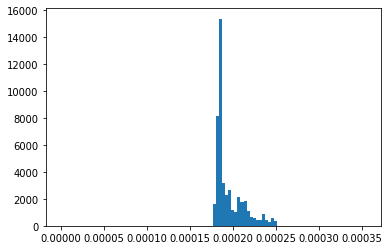

In [64]:
plt.hist(data.realized_volatility, bins = 100);